# Problem statement - Predicting Breast Cancer in a patient

# Analytic approach - Binary class classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
df = pd.read_csv("D:/Imarticus/Datasets/cancer.csv")

In [5]:
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
465,9113239,B,13.24,20.13,86.87,542.9,0.08284,0.12230,0.10100,0.02833,0.1601,0.06432,0.2810,0.8135,3.369,23.810,0.004929,0.066570,0.076830,0.013680,0.01526,0.008133,15.44,25.50,115.00,733.5,0.12010,0.56460,0.65560,0.13570,0.2845,0.12490,NaN
523,917896,B,13.71,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.03783,0.1714,0.06843,0.3191,1.2490,2.284,26.450,0.006739,0.022510,0.020860,0.013520,0.01870,0.003747,15.11,25.63,99.43,701.9,0.14250,0.25660,0.19350,0.12840,0.2849,0.09031,NaN
241,883539,B,12.42,15.04,78.61,476.5,0.07926,0.03393,0.01053,0.01108,0.1546,0.05754,0.1153,0.6745,0.757,9.006,0.003265,0.004930,0.006493,0.003762,0.01720,0.001360,13.20,20.37,83.85,543.4,0.10370,0.07776,0.06243,0.04052,0.2901,0.06783,NaN
329,895633,M,16.26,21.88,107.50,826.8,0.11650,0.12830,0.17990,0.07981,0.1869,0.06532,0.5706,1.4570,2.961,57.720,0.010560,0.037560,0.058390,0.011860,0.04022,0.006187,17.73,25.21,113.70,975.2,0.14260,0.21160,0.33440,0.10470,0.2736,0.07953,NaN
30,853401,M,18.63,25.11,124.80,1088.0,0.10640,0.18870,0.23190,0.12440,0.2183,0.06197,0.8307,1.4660,5.574,105.000,0.006248,0.033740,0.051960,0.011580,0.02007,0.004560,23.15,34.01,160.50,1670.0,0.14910,0.42570,0.61330,0.18480,0.3444,0.09782,NaN
93,862009,B,13.45,18.30,86.60,555.1,0.10220,0.08165,0.03974,0.02780,0.1638,0.05710,0.2950,1.3730,2.099,25.220,0.005884,0.014910,0.018720,0.009366,0.01884,0.001817,15.10,25.94,97.59,699.4,0.13390,0.17510,0.13810,0.07911,0.2678,0.06603,NaN
69,859487,B,12.78,16.49,81.37,502.5,0.09831,0.05234,0.03653,0.02864,0.1590,0.05653,0.2368,0.8732,1.471,18.330,0.007962,0.005612,0.015850,0.008662,0.02254,0.001906,13.46,19.76,85.67,554.9,0.12960,0.07061,0.10390,0.05882,0.2383,0.06410,NaN
200,877501,B,12.23,19.56,78.54,461.0,0.09586,0.08087,0.04187,0.04107,0.1979,0.06013,0.3534,1.3260,2.308,27.240,0.007514,0.017790,0.014010,0.011400,0.01503,0.003338,14.44,28.36,92.15,638.4,0.14290,0.20420,0.13770,0.10800,0.2668,0.08174,NaN
290,89143602,B,14.41,19.73,96.03,651.0,0.08757,0.16760,0.13620,0.06602,0.1714,0.07192,0.8811,1.7700,4.360,77.110,0.007762,0.106400,0.099600,0.027710,0.04077,0.022860,15.77,22.13,101.70,767.3,0.09983,0.24720,0.22200,0.10210,0.2272,0.08799,NaN
549,923465,B,10.82,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.00816,0.1976,0.06328,0.5196,1.9180,3.564,33.000,0.008263,0.018700,0.012770,0.005917,0.02466,0.002977,13.03,31.45,83.90,505.6,0.12040,0.16330,0.06194,0.03264,0.3059,0.07626,NaN


In [6]:
df.shape

(569, 33)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


In [9]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## Drop irrelevant columns

In [10]:
df.drop(columns=['id','Unnamed: 32'],axis=1,inplace=True)

## Data is balanced or not ?

In [11]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

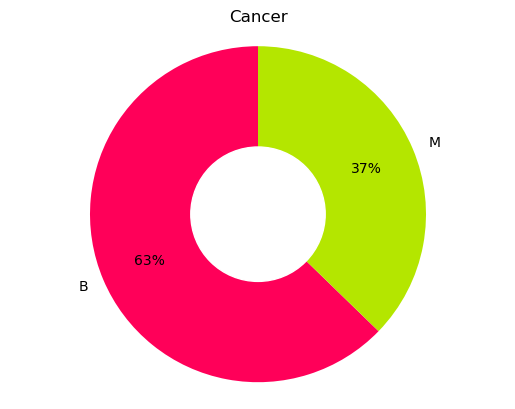

In [12]:
freq = df['diagnosis'].value_counts()
counts = freq.to_list()
keys = freq.keys().to_list()
colors = ["#ff0059","#b4e600"]
plt.pie(x=counts,labels = keys,colors=colors,autopct='%1.0f%%',startangle=90, pctdistance=0.70)
circle = plt.Circle(xy=(0,0),radius=0.4,color='white')
plt.gcf()
plt.gca().add_artist(circle)
plt.axis('equal')
plt.title("Cancer")
plt.show()

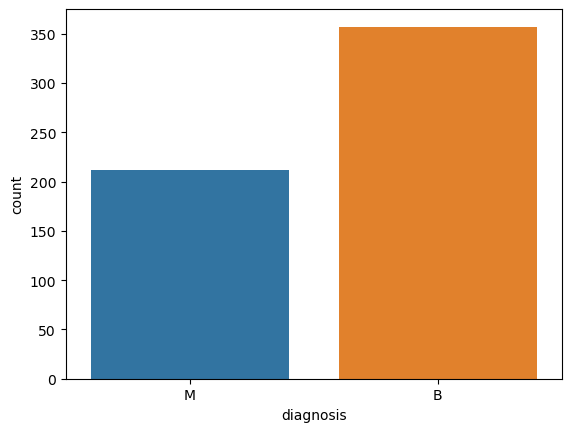

In [13]:
sns.countplot(data=df,x='diagnosis')
plt.show()

## Data distribution using histplot and distplot

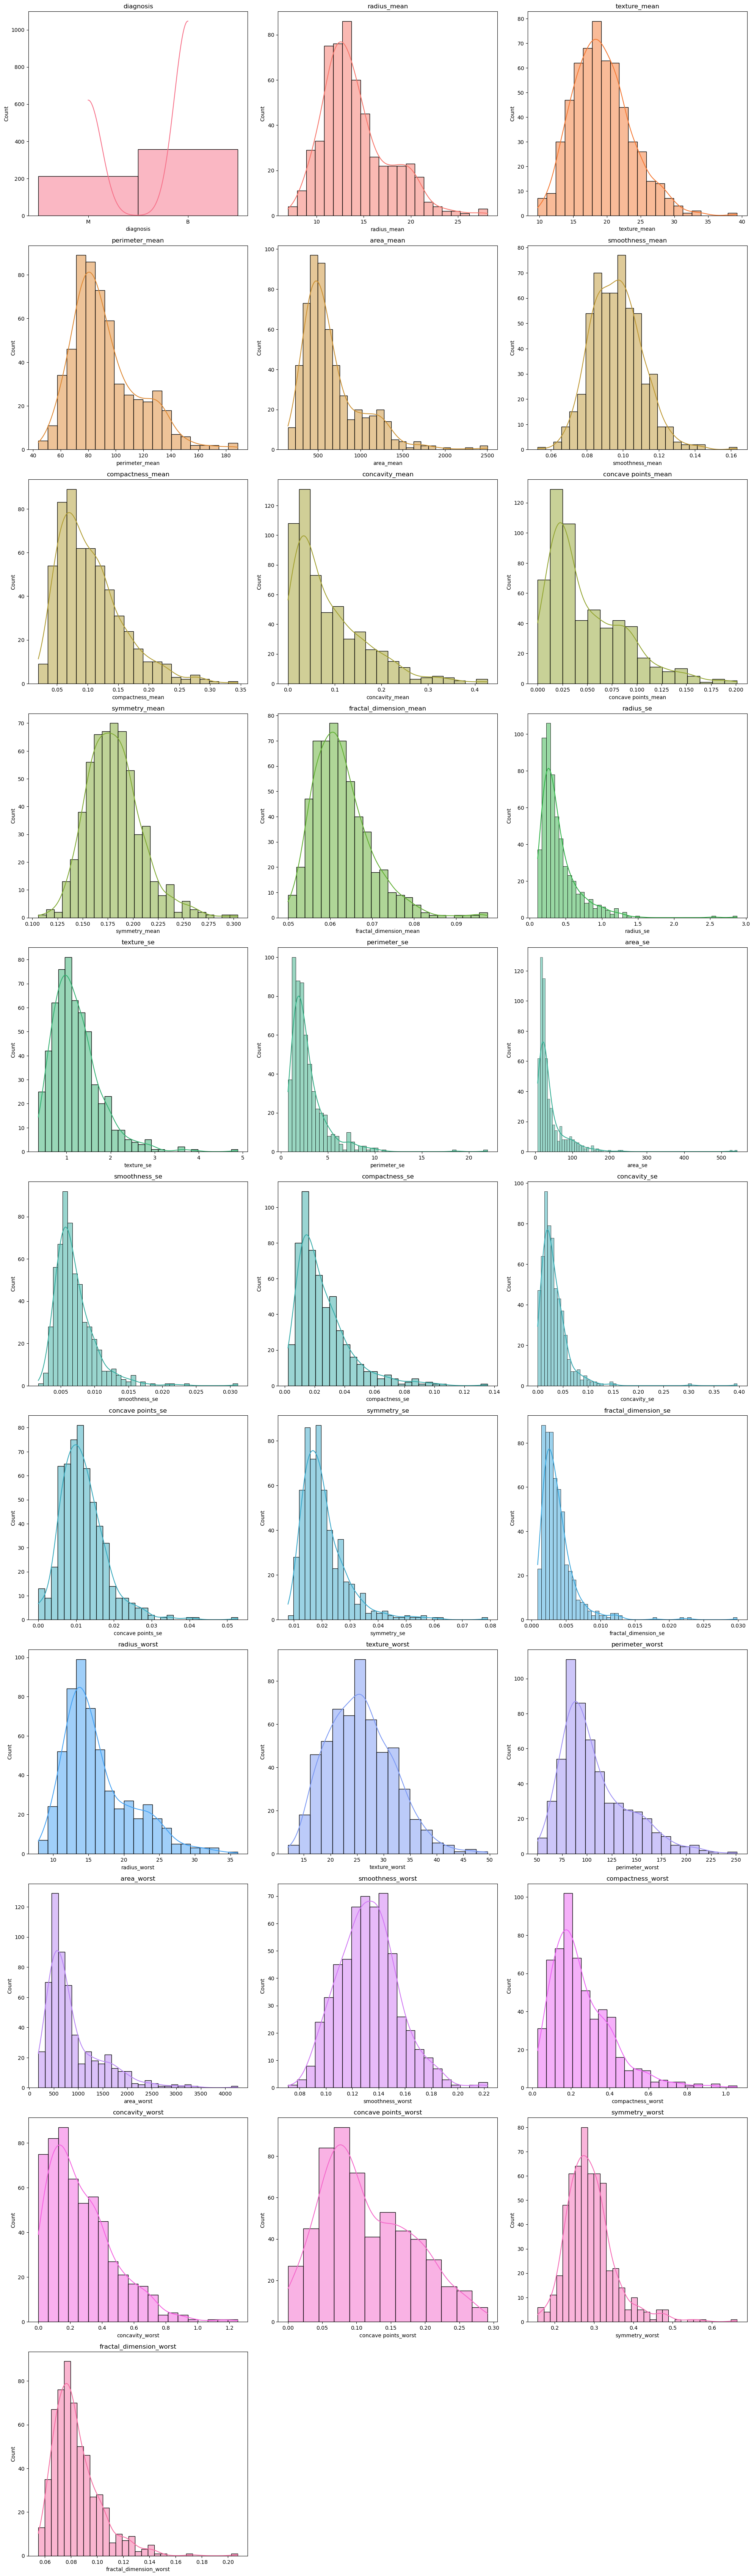

In [14]:
num_columns = df.shape[1]
num_rows = 13
num_cols = (num_columns + num_rows - 1) // num_rows

# Define a list of colors
colors = sns.color_palette('husl', num_columns)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 80))

for i, column in enumerate(df.columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(data=df, x=column, kde=True, color=colors[i], line_kws={'color': 'black'}, ax=ax)
    ax.set_title(column)


# Remove empty subplots
if num_columns < num_rows * num_cols:
    for j in range(num_columns, num_rows * num_cols):
        fig.delaxes(axes[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()

## Data is skewed or not ?

In [15]:
df.skew()

C:\Users\dell\AppData\Local\Temp\ipykernel_2800\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

## Outliers is there or not?

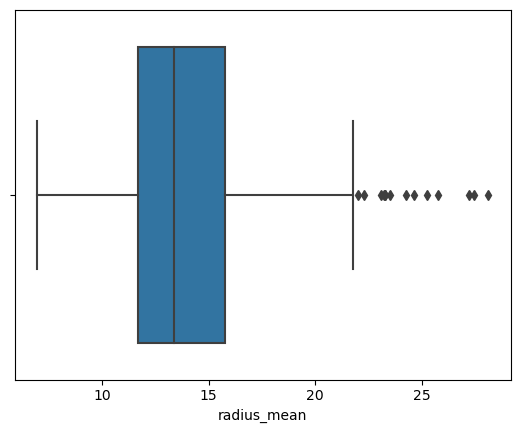

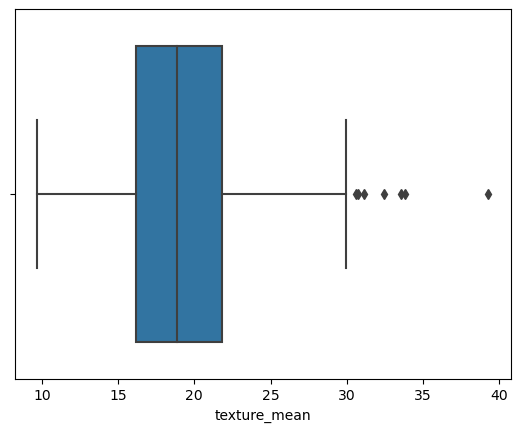

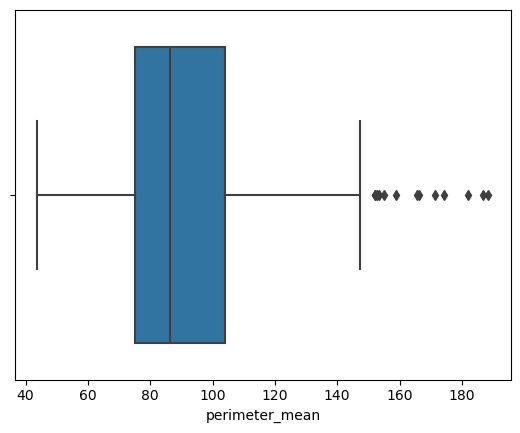

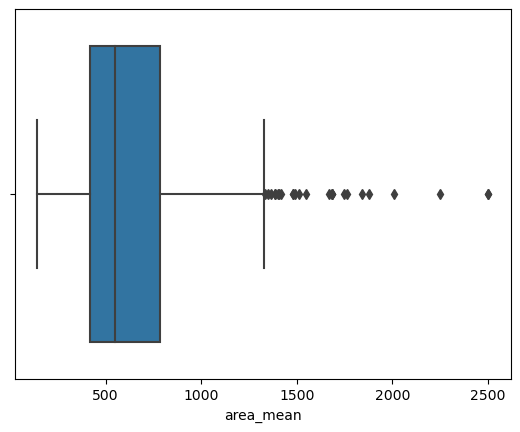

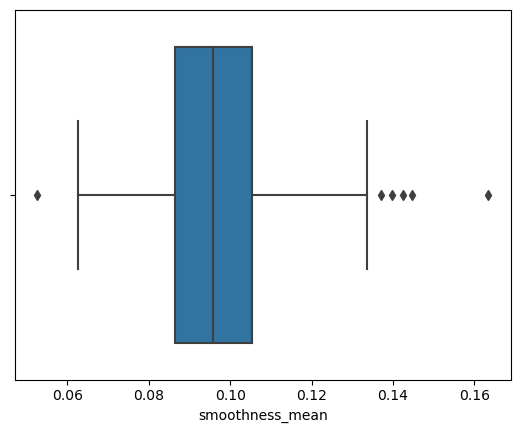

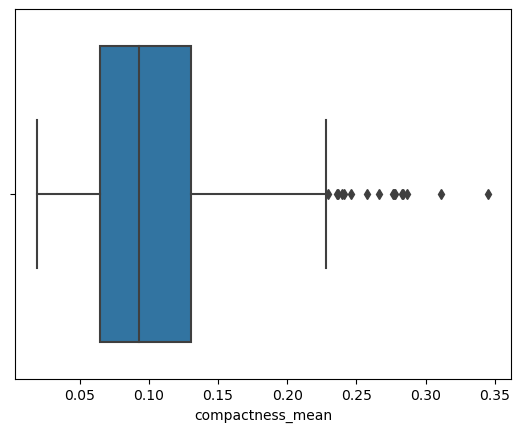

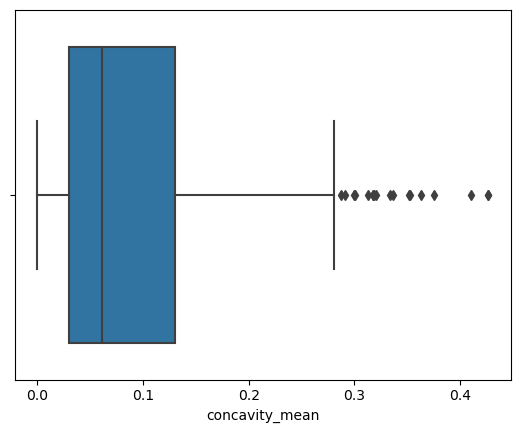

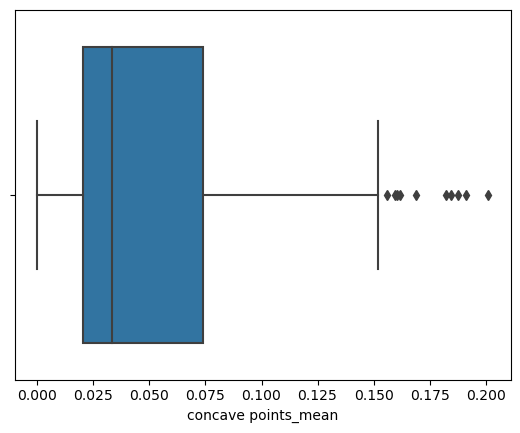

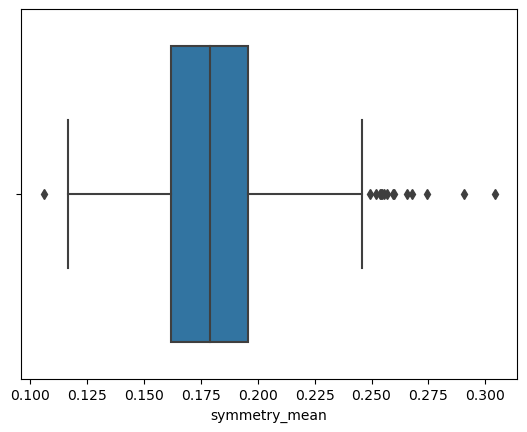

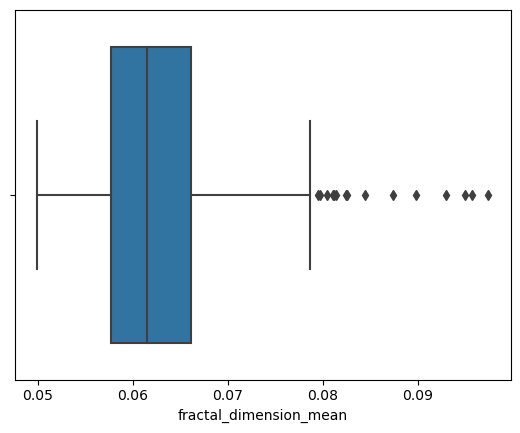

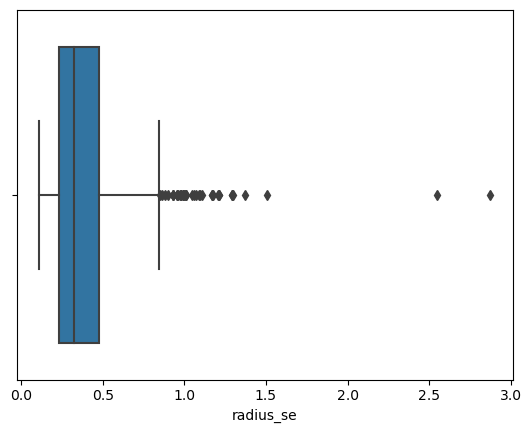

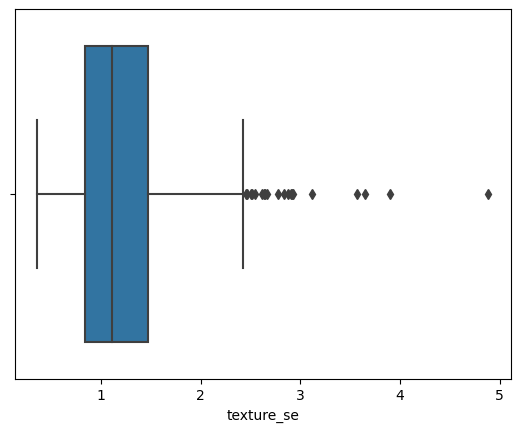

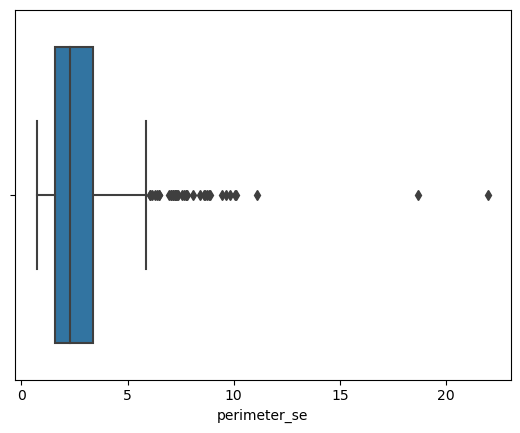

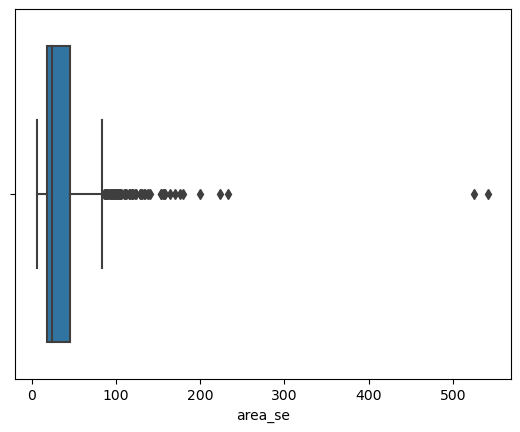

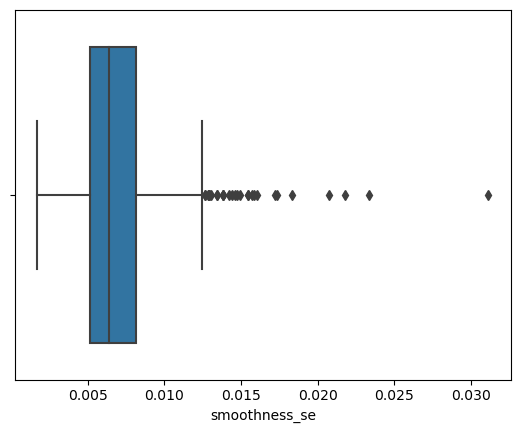

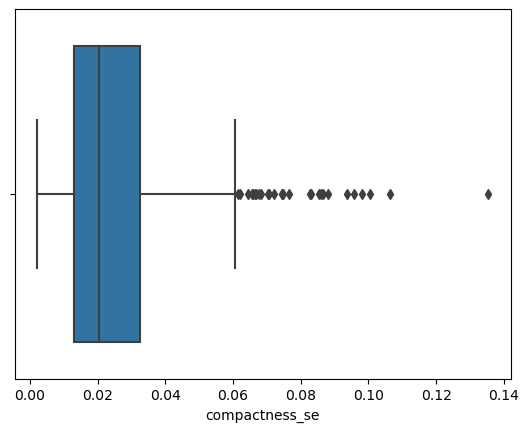

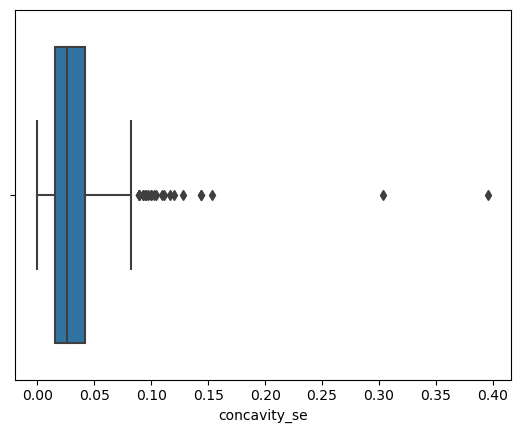

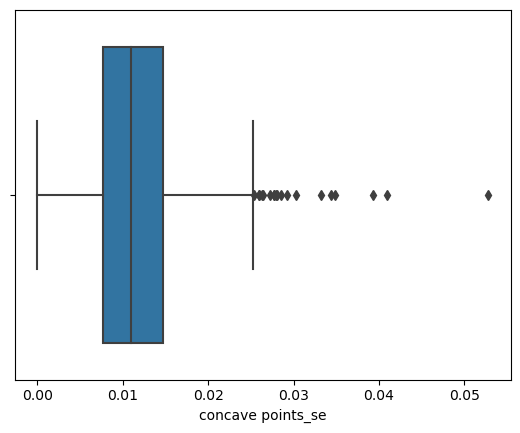

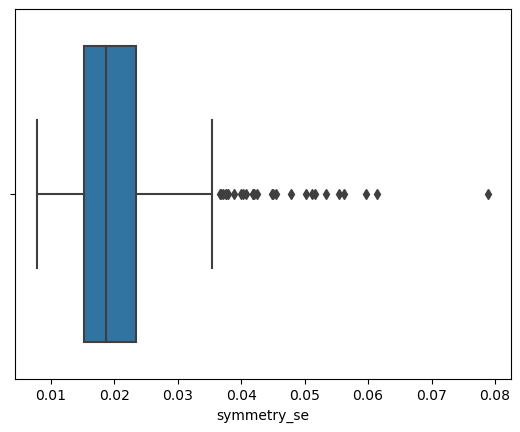

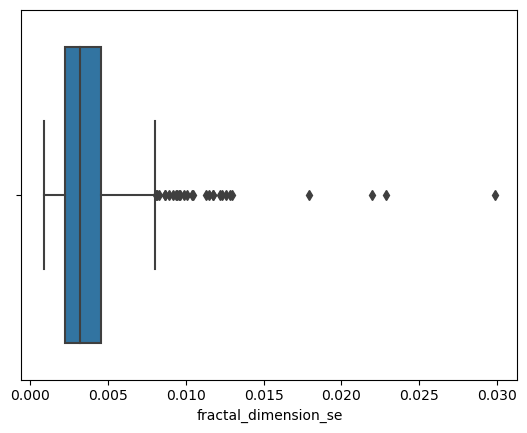

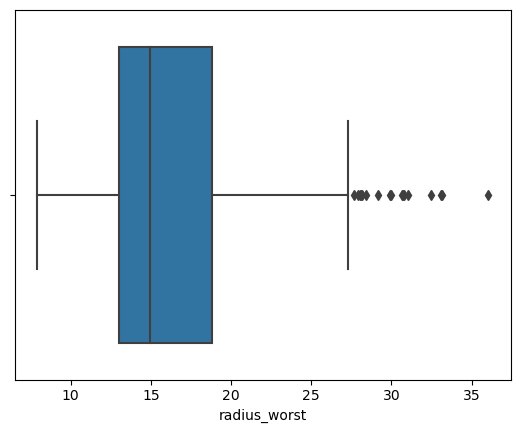

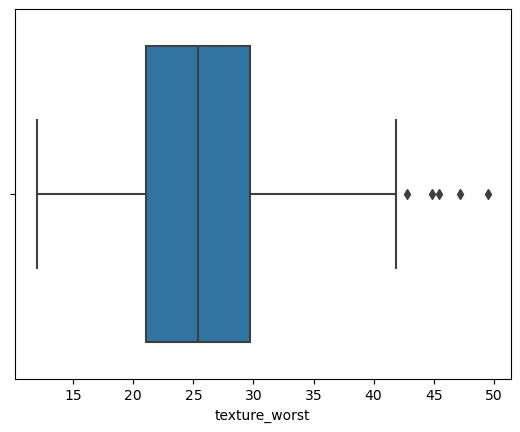

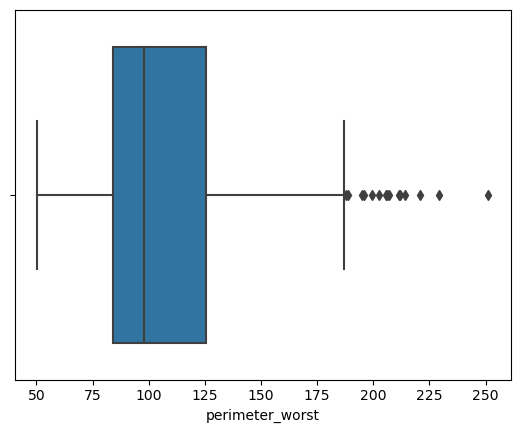

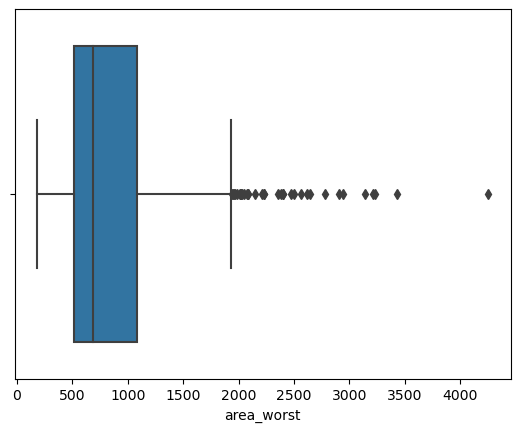

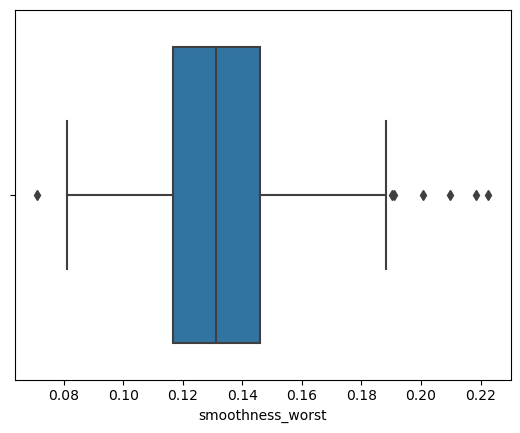

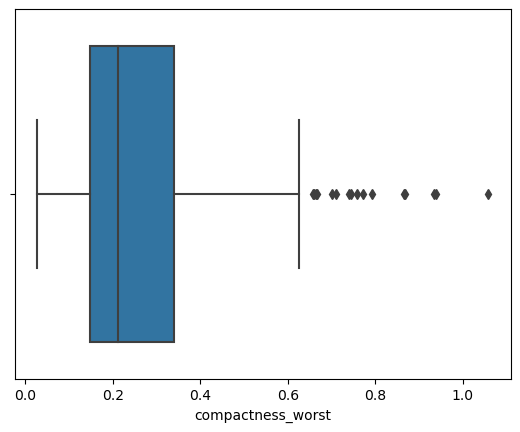

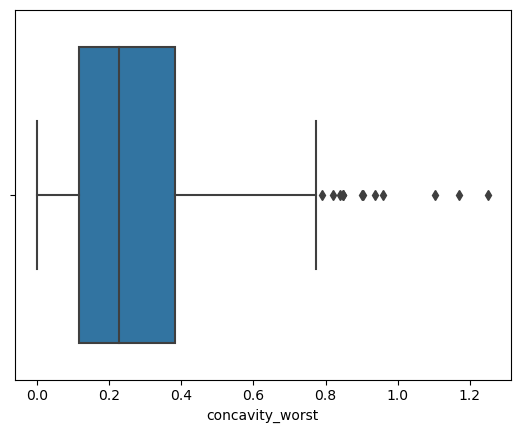

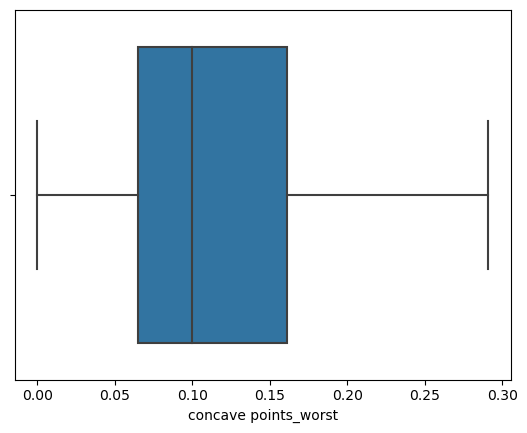

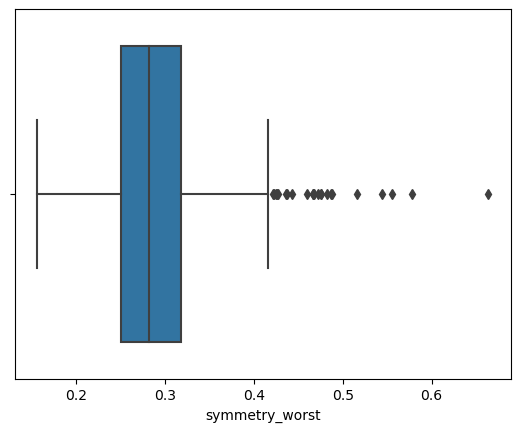

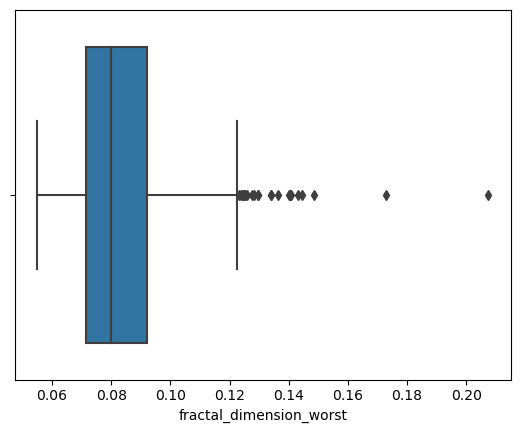

In [16]:
for i in df.select_dtypes(exclude='object'):
    sns.boxplot(x=i,data=df)
    plt.show()

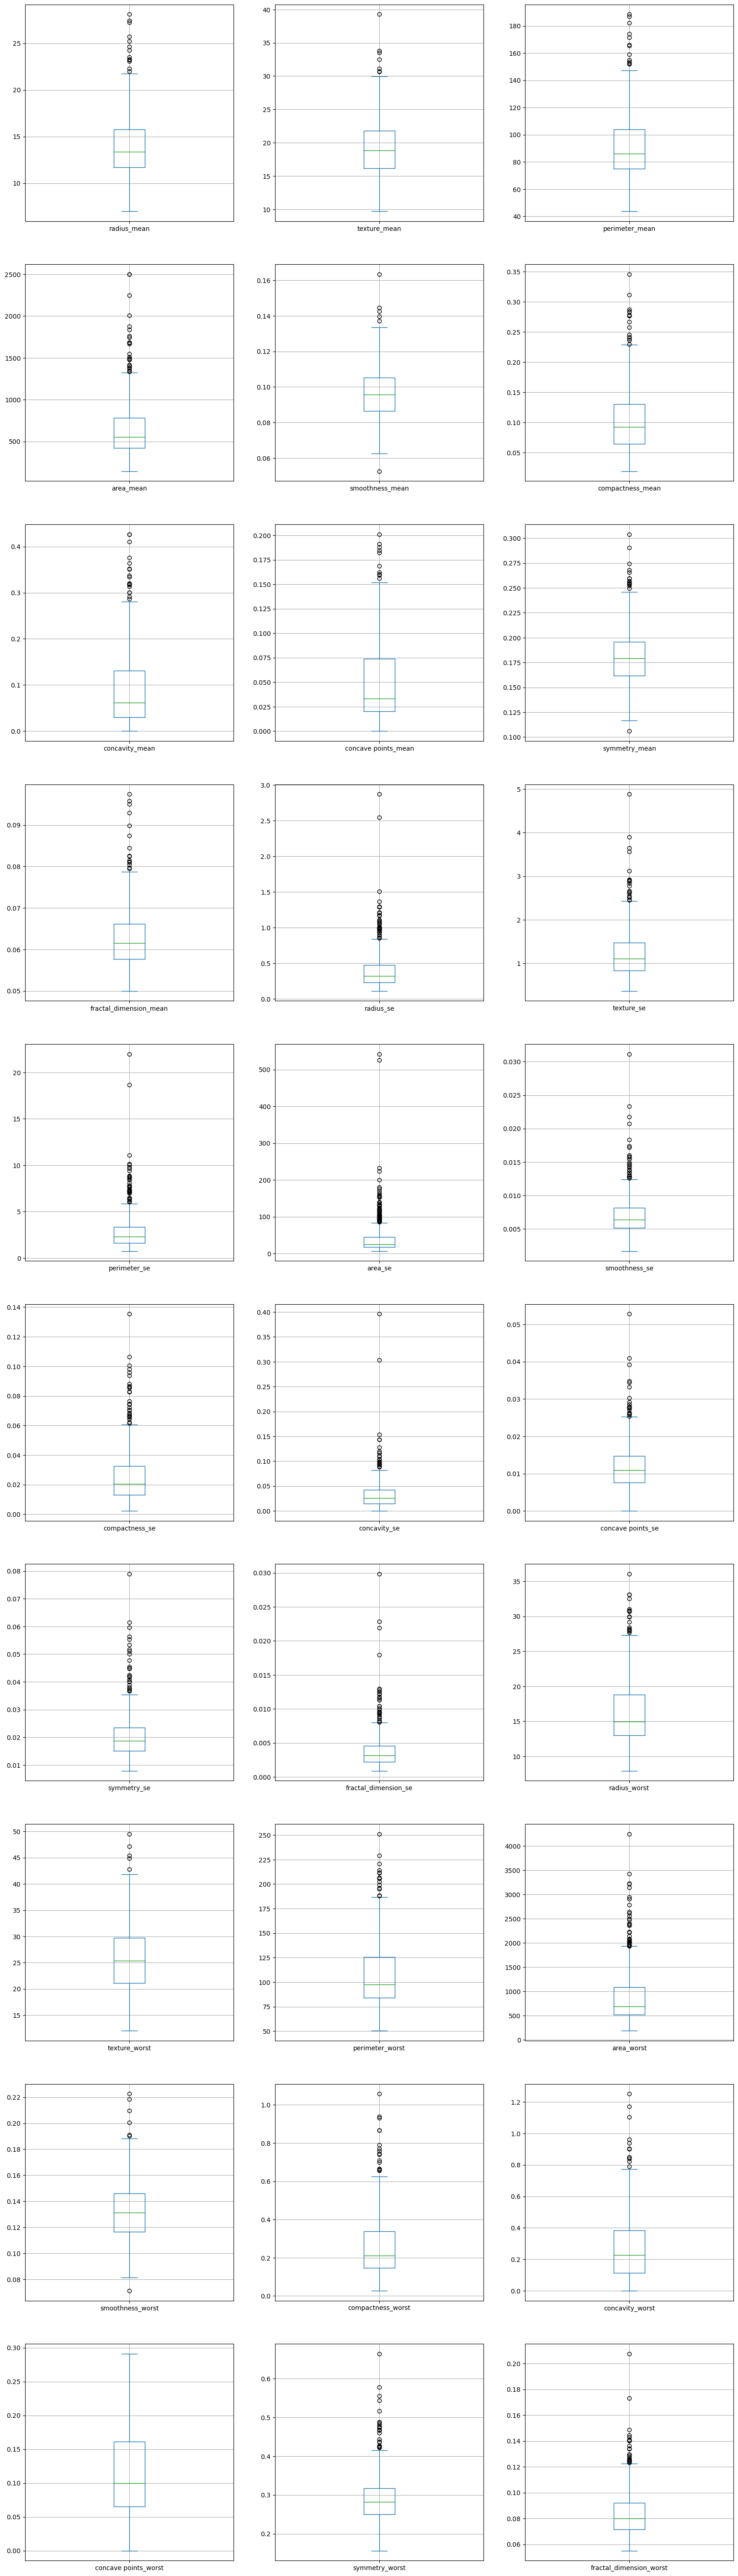

In [17]:
#colors = sns.color_palette("tab10")

df.plot(kind='box',subplots=True, layout=(11,3), sharex=False, sharey=False , figsize =(20,80) , grid = True )

plt.show()

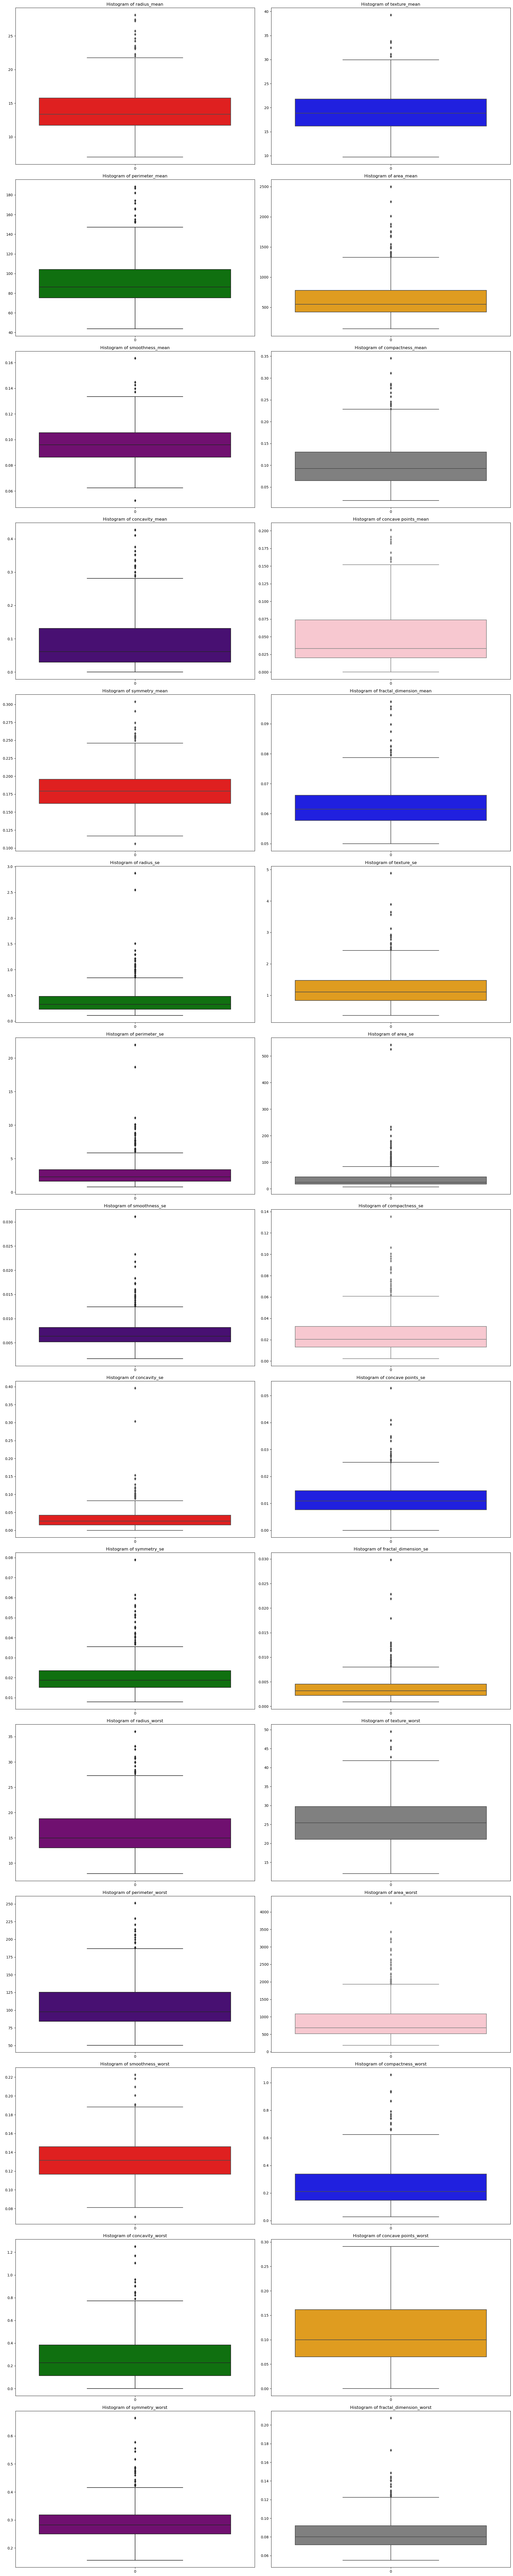

In [18]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'gray', 'indigo', 'pink']
x = df.drop('diagnosis',axis=1)
num_cols = len(x.columns)
num_rows = (num_cols + 1) // 2  

fig, axes = plt.subplots(num_rows, 2, figsize=(20,100))

if num_rows == 1:
    axes = axes.reshape(1, -1)

for i, column in enumerate(x.columns):
    row = i // 2  
    col = i % 2   
    sns.boxplot(x[column], ax=axes[row][col], color=colors[i % len(colors)])
    axes[row][col].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

## Standardization method for checking skewness

In [19]:
std = StandardScaler()

df1=df.copy()

cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

for i in cols:
    df1[i] = std.fit_transform(df1[[i]])

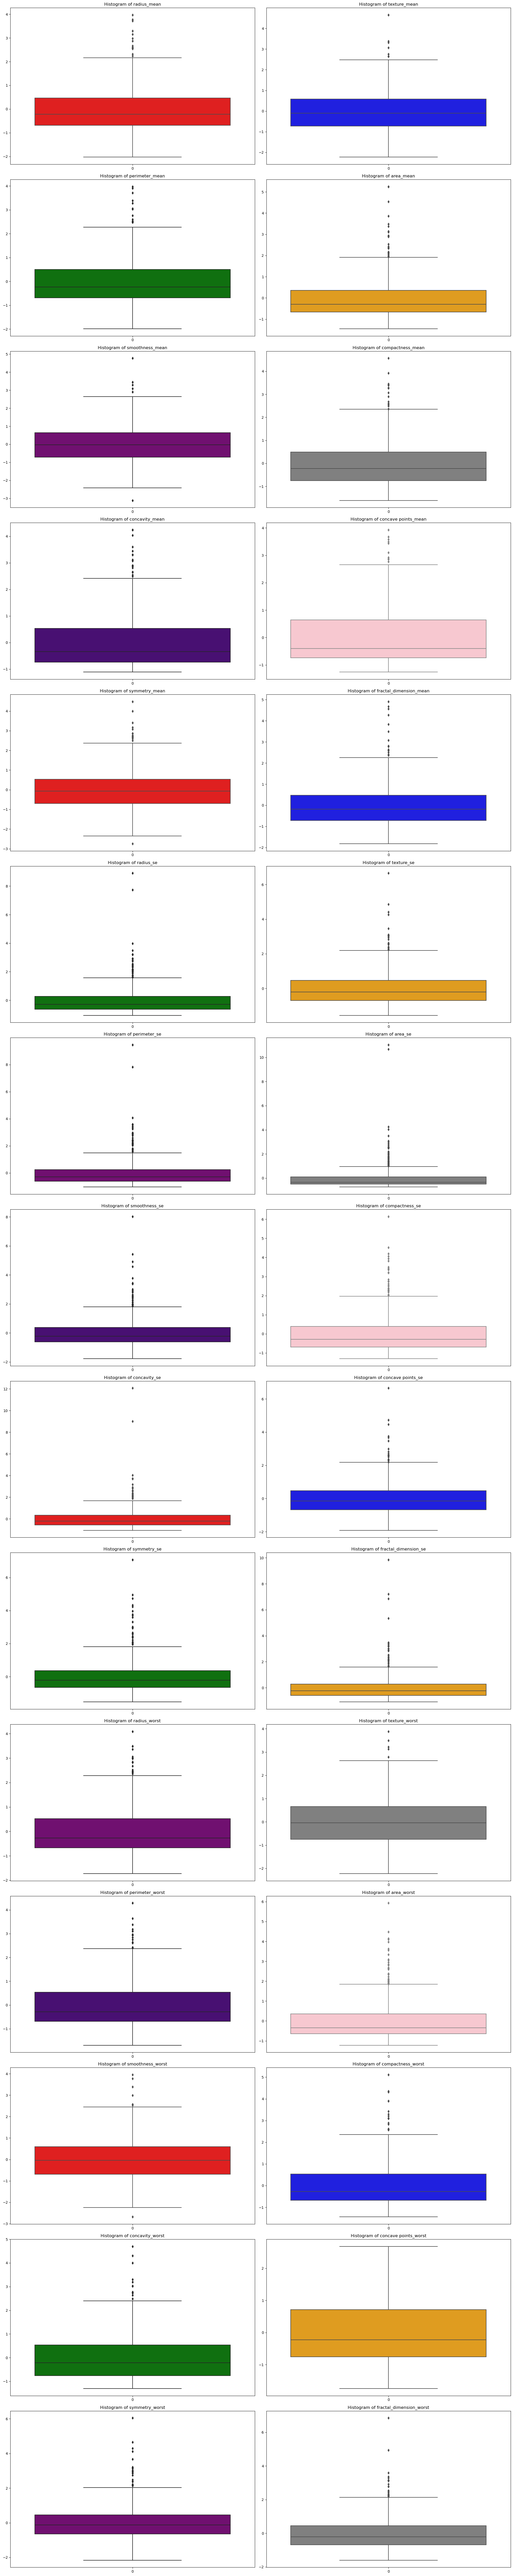

In [20]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'gray', 'indigo', 'pink']
x = df1.drop('diagnosis',axis=1)
num_cols = len(x.columns)
num_rows = (num_cols + 1) // 2  

fig, axes = plt.subplots(num_rows, 2, figsize=(20,100))

if num_rows == 1:
    axes = axes.reshape(1, -1)

for i, column in enumerate(x.columns):
    row = i // 2  
    col = i % 2   
    sns.boxplot(x[column], ax=axes[row][col], color=colors[i % len(colors)])
    axes[row][col].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

In [21]:
for i in df.select_dtypes(exclude='object'):
    
    data = abs(df[i].skew()-df1[i].skew()).round(2)
    print(i, '- ',df[i].skew().round(2),' , ',df1[i].skew().round(2),'- ',data)

radius_mean -  0.94  ,  0.94 -  0.0
texture_mean -  0.65  ,  0.65 -  0.0
perimeter_mean -  0.99  ,  0.99 -  0.0
area_mean -  1.65  ,  1.65 -  0.0
smoothness_mean -  0.46  ,  0.46 -  0.0
compactness_mean -  1.19  ,  1.19 -  0.0
concavity_mean -  1.4  ,  1.4 -  0.0
concave points_mean -  1.17  ,  1.17 -  0.0
symmetry_mean -  0.73  ,  0.73 -  0.0
fractal_dimension_mean -  1.3  ,  1.3 -  0.0
radius_se -  3.09  ,  3.09 -  0.0
texture_se -  1.65  ,  1.65 -  0.0
perimeter_se -  3.44  ,  3.44 -  0.0
area_se -  5.45  ,  5.45 -  0.0
smoothness_se -  2.31  ,  2.31 -  0.0
compactness_se -  1.9  ,  1.9 -  0.0
concavity_se -  5.11  ,  5.11 -  0.0
concave points_se -  1.44  ,  1.44 -  0.0
symmetry_se -  2.2  ,  2.2 -  0.0
fractal_dimension_se -  3.92  ,  3.92 -  0.0
radius_worst -  1.1  ,  1.1 -  0.0
texture_worst -  0.5  ,  0.5 -  0.0
perimeter_worst -  1.13  ,  1.13 -  0.0
area_worst -  1.86  ,  1.86 -  0.0
smoothness_worst -  0.42  ,  0.42 -  0.0
compactness_worst -  1.47  ,  1.47 -  0.0
concavity

## Normalization method to check skewness 

In [22]:
M = MinMaxScaler()

df2 =df.copy()

cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

for i in cols:
    df2[i] = M.fit_transform(df2[[i]])

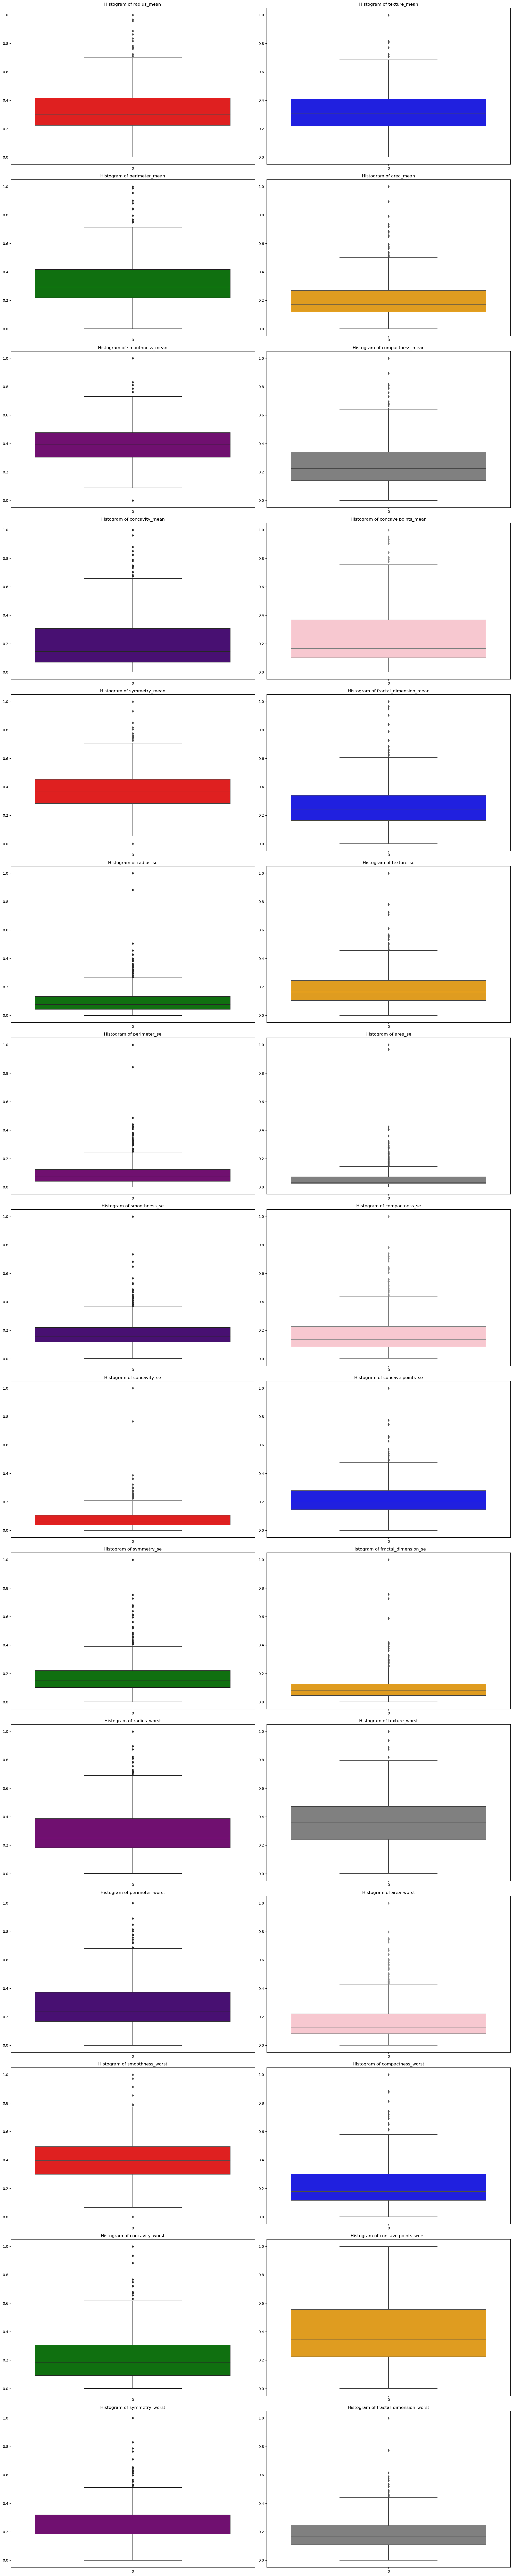

In [23]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'gray', 'indigo', 'pink']
x = df2.drop('diagnosis',axis=1)
num_cols = len(x.columns)
num_rows = (num_cols + 1) // 2  

fig, axes = plt.subplots(num_rows, 2, figsize=(20,100))

if num_rows == 1:
    axes = axes.reshape(1, -1)

for i, column in enumerate(x.columns):
    row = i // 2  
    col = i % 2   
    sns.boxplot(x[column], ax=axes[row][col], color=colors[i % len(colors)])
    axes[row][col].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

In [24]:
for i in df.select_dtypes(exclude='object'):
    
    data = abs(df[i].skew()-df2[i].skew()).round(2)
    print(i, '- ',df[i].skew().round(2),' , ',df2[i].skew().round(2),'- ',data)

radius_mean -  0.94  ,  0.94 -  0.0
texture_mean -  0.65  ,  0.65 -  0.0
perimeter_mean -  0.99  ,  0.99 -  0.0
area_mean -  1.65  ,  1.65 -  0.0
smoothness_mean -  0.46  ,  0.46 -  0.0
compactness_mean -  1.19  ,  1.19 -  0.0
concavity_mean -  1.4  ,  1.4 -  0.0
concave points_mean -  1.17  ,  1.17 -  0.0
symmetry_mean -  0.73  ,  0.73 -  0.0
fractal_dimension_mean -  1.3  ,  1.3 -  0.0
radius_se -  3.09  ,  3.09 -  0.0
texture_se -  1.65  ,  1.65 -  0.0
perimeter_se -  3.44  ,  3.44 -  0.0
area_se -  5.45  ,  5.45 -  0.0
smoothness_se -  2.31  ,  2.31 -  0.0
compactness_se -  1.9  ,  1.9 -  0.0
concavity_se -  5.11  ,  5.11 -  0.0
concave points_se -  1.44  ,  1.44 -  0.0
symmetry_se -  2.2  ,  2.2 -  0.0
fractal_dimension_se -  3.92  ,  3.92 -  0.0
radius_worst -  1.1  ,  1.1 -  0.0
texture_worst -  0.5  ,  0.5 -  0.0
perimeter_worst -  1.13  ,  1.13 -  0.0
area_worst -  1.86  ,  1.86 -  0.0
smoothness_worst -  0.42  ,  0.42 -  0.0
compactness_worst -  1.47  ,  1.47 -  0.0
concavity

## Model building

## 1. Bagging model without n_estimators without scaled 

In [25]:
df.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
313,B,11.540,10.72,73.73,409.1,0.08597,0.05969,0.013670,0.008907,0.1833,0.06100,0.1312,0.3602,1.107,9.438,0.004124,0.013400,0.01003,0.004667,0.020320,0.001952,12.34,12.87,81.23,467.8,0.1092,0.16260,0.08324,0.04715,0.3390,0.07434
242,B,11.300,18.19,73.93,389.4,0.09592,0.13250,0.154800,0.028540,0.2054,0.07669,0.2428,1.6420,2.369,16.390,0.006663,0.059140,0.08880,0.013140,0.019950,0.008675,12.58,27.96,87.16,472.9,0.1347,0.48480,0.74360,0.12180,0.3308,0.12970
476,B,14.200,20.53,92.41,618.4,0.08931,0.11080,0.050630,0.030580,0.1506,0.06009,0.3478,1.0180,2.749,31.010,0.004107,0.032880,0.02821,0.013500,0.016100,0.002744,16.45,27.26,112.10,828.5,0.1153,0.34290,0.25120,0.13390,0.2534,0.07858
179,B,12.810,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.013300,0.1466,0.06133,0.2889,0.9899,1.778,21.790,0.008534,0.006364,0.00618,0.007408,0.010650,0.003351,13.63,16.15,86.70,570.7,0.1162,0.05445,0.02758,0.03990,0.1783,0.07319
64,M,12.680,23.84,82.69,499.0,0.11220,0.12620,0.112800,0.068730,0.1905,0.06590,0.4255,1.1780,2.927,36.460,0.007781,0.026480,0.02973,0.012900,0.016350,0.003601,17.09,33.47,111.80,888.3,0.1851,0.40610,0.40240,0.17160,0.3383,0.10310
363,B,16.500,18.29,106.60,838.1,0.09686,0.08468,0.058620,0.048350,0.1495,0.05593,0.3389,1.4390,2.344,33.580,0.007257,0.018050,0.01832,0.010330,0.016940,0.002001,18.13,25.45,117.20,1009.0,0.1338,0.16790,0.16630,0.09123,0.2394,0.06469
348,B,11.470,16.03,73.02,402.7,0.09076,0.05886,0.025870,0.023220,0.1634,0.06372,0.1707,0.7615,1.090,12.250,0.009191,0.008548,0.00940,0.006315,0.017550,0.003009,12.51,20.79,79.67,475.8,0.1531,0.11200,0.09823,0.06548,0.2851,0.08763
96,B,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,0.1900,0.06635,0.3661,1.5110,2.410,24.440,0.005433,0.011790,0.01131,0.015190,0.022200,0.003408,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376
259,M,15.530,33.56,103.70,744.9,0.10630,0.16390,0.175100,0.083990,0.2091,0.06650,0.2419,1.2780,1.903,23.020,0.005345,0.025560,0.02889,0.010220,0.009947,0.003359,18.49,49.54,126.30,1035.0,0.1883,0.55640,0.57030,0.20140,0.3512,0.12040
101,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.000000,0.000000,0.1930,0.07818,0.2241,1.5080,1.553,9.833,0.010190,0.010840,0.00000,0.000000,0.026590,0.004100,7.93,19.54,50.41,185.2,0.1584,0.12020,0.00000,0.00000,0.2932,0.09382


In [26]:
X1 = df.drop('diagnosis',axis=1)
y1 = df['diagnosis']

X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.3,random_state=0)

model_1 = BaggingClassifier()
model_1.fit(X_train,y_train)

print('Train - ',model_1.score(X_train,y_train))
print('Test - ',model_1.score(X_test,y_test))


Train -  0.9974874371859297
Test -  0.9415204678362573


## 2. Bagging model with n_estimators without scaled 

In [27]:
X2 = df.drop('diagnosis',axis=1)
y2 = df['diagnosis']

X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.3,random_state=0)

for i in range(11,101):
        model_2 = BaggingClassifier(n_estimators =i )
        model_2.fit(X_train,y_train)
        train = model_2.score(X_train,y_train).round(2)
        test = model_2.score(X_test,y_test).round(2)
        print(i,' - ',train,' , ',test,' , ',abs(train-test).round(2))

11  -  1.0  ,  0.95  ,  0.05
12  -  1.0  ,  0.95  ,  0.05
13  -  1.0  ,  0.97  ,  0.03
14  -  1.0  ,  0.95  ,  0.05
15  -  1.0  ,  0.97  ,  0.03
16  -  1.0  ,  0.96  ,  0.04
17  -  1.0  ,  0.95  ,  0.05
18  -  1.0  ,  0.96  ,  0.04
19  -  1.0  ,  0.92  ,  0.08
20  -  1.0  ,  0.95  ,  0.05
21  -  1.0  ,  0.96  ,  0.04
22  -  1.0  ,  0.94  ,  0.06
23  -  1.0  ,  0.95  ,  0.05
24  -  1.0  ,  0.96  ,  0.04
25  -  1.0  ,  0.95  ,  0.05
26  -  1.0  ,  0.97  ,  0.03
27  -  1.0  ,  0.97  ,  0.03
28  -  1.0  ,  0.95  ,  0.05
29  -  1.0  ,  0.92  ,  0.08
30  -  1.0  ,  0.95  ,  0.05
31  -  1.0  ,  0.95  ,  0.05
32  -  1.0  ,  0.95  ,  0.05
33  -  1.0  ,  0.96  ,  0.04
34  -  1.0  ,  0.95  ,  0.05
35  -  1.0  ,  0.95  ,  0.05
36  -  1.0  ,  0.96  ,  0.04
37  -  1.0  ,  0.96  ,  0.04
38  -  1.0  ,  0.95  ,  0.05
39  -  1.0  ,  0.96  ,  0.04
40  -  1.0  ,  0.96  ,  0.04
41  -  1.0  ,  0.96  ,  0.04
42  -  1.0  ,  0.97  ,  0.03
43  -  1.0  ,  0.96  ,  0.04
44  -  1.0  ,  0.94  ,  0.06
45  -  1.0  , 

In [28]:
model_2 = BaggingClassifier(n_estimators =12)
model_2.fit(X_train,y_train)

print('Train - ',model_2.score(X_train,y_train))
print('Test - ',model_2.score(X_test,y_test))

Train -  0.9974874371859297
Test -  0.9532163742690059


## 3. Bagging model with Standardization scaled

In [29]:
X3 = df1.drop('diagnosis',axis=1)
y3 = df1['diagnosis']

X_train,X_test,y_train,y_test = train_test_split(X3,y3,test_size=0.3,random_state=0)

model_3 = BaggingClassifier()
model_3.fit(X_train,y_train)

print('Train - ',model_3.score(X_train,y_train))
print('Test - ',model_3.score(X_test,y_test))


Train -  1.0
Test -  0.9473684210526315


## 4. Bagging model with Normalization scaled

In [30]:
X4 = df2.drop('diagnosis',axis=1)
y4 = df2['diagnosis']

X_train,X_test,y_train,y_test = train_test_split(X4,y4,test_size=0.3,random_state=0)

model_4 = BaggingClassifier()
model_4.fit(X_train,y_train)

print('Train - ',model_4.score(X_train,y_train))
print('Test - ',model_4.score(X_test,y_test))


Train -  0.9949748743718593
Test -  0.9473684210526315


## 5. Bagging model with upsampling

In [31]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [32]:
#To keep original data as it is to use the same for later.
df3 = df.copy()

#Getting seperated data with 1 and 0 status.
df_majority = df3[df3.diagnosis=='B']
df_minority = df3[df3.diagnosis=='M']

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_minority_upsampled = resample(df_minority,replace=True,n_samples=357,random_state=123)

df3 = pd.concat([df_minority_upsampled,df_majority])
print("Upsampled data:->\n",df3.diagnosis.value_counts())

Upsampled data:->
 M    357
B    357
Name: diagnosis, dtype: int64


In [33]:
X5 = df3.drop('diagnosis',axis=1)
y5 = df3['diagnosis']

X_train,X_test,y_train,y_test = train_test_split(X5,y5,test_size=0.3,random_state=0)

model_5 = BaggingClassifier()
model_5.fit(X_train,y_train)

print('Train - ',model_5.score(X_train,y_train))
print('Test - ',model_5.score(X_test,y_test))


Train -  1.0
Test -  0.9813953488372092


## 6. Bagging model with downsampling

In [34]:
df4 = df.copy()

#Getting seperated data with 1 and 0 status.
df_majority = df4[df4.diagnosis=='B']
df_minority = df4[df4.diagnosis=='M']

#Here we are downsampling the Majority Class Data Points. 
#i.e. We will get equal amount of datapoint as Minority class from Majority class

df_majority_downsampled = resample(df_majority,replace=False,n_samples=212,random_state=123)
df4 = pd.concat([df_majority_downsampled,df_minority])
print("Downsampled data:->\n",df4.diagnosis.value_counts())

Downsampled data:->
 B    212
M    212
Name: diagnosis, dtype: int64


In [35]:
X6 = df4.drop('diagnosis',axis=1)
y6 = df4['diagnosis']

X_train,X_test,y_train,y_test = train_test_split(X6,y6,test_size=0.3,random_state=0)

model_6 = BaggingClassifier()
model_6.fit(X_train,y_train)

print('Train - ',model_6.score(X_train,y_train))
print('Test - ',model_6.score(X_test,y_test))

Train -  0.9932432432432432
Test -  0.96875


## 7. Bagging model with upsampling with scaled

In [36]:
#To keep original data as it is to use the same for later.
df5 = df1.copy()

#Getting seperated data with 1 and 0 status.
df_majority = df5[df5.diagnosis=='B']
df_minority = df5[df5.diagnosis=='M']

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_minority_upsampled = resample(df_minority,replace=True,n_samples=357,random_state=123)

df5 = pd.concat([df_majority,df_minority_upsampled])
print("Upsampled data:->\n",df5.diagnosis.value_counts())

Upsampled data:->
 B    357
M    357
Name: diagnosis, dtype: int64


In [37]:
X7 = df5.drop('diagnosis',axis=1)
y7 = df5['diagnosis']

X_train,X_test,y_train,y_test = train_test_split(X7,y7,test_size=0.3,random_state=0)

model_7 = BaggingClassifier()
model_7.fit(X_train,y_train)

print('Train - ',model_7.score(X_train,y_train))
print('Test - ',model_7.score(X_test,y_test))

Train -  0.9979959919839679
Test -  0.9953488372093023


## 8. Bagging model with downsampling with scaled

In [38]:
df6 = df1.copy()

#Getting seperated data with 1 and 0 status.
df_majority = df6[df6.diagnosis=='B']
df_minority = df6[df6.diagnosis=='M']

#Here we are downsampling the Majority Class Data Points. 
#i.e. We will get equal amount of datapoint as Minority class from Majority class

df_majority_downsampled = resample(df_majority,replace=False,n_samples=212,random_state=123)
df6 = pd.concat([df_majority_downsampled,df_minority])
print("Downsampled data:->\n",df6.diagnosis.value_counts())

Downsampled data:->
 B    212
M    212
Name: diagnosis, dtype: int64


In [39]:
X8 = df6.drop('diagnosis',axis=1)
y8 = df6['diagnosis']

X_train,X_test,y_train,y_test = train_test_split(X8,y8,test_size=0.3,random_state=0)

model_8 = BaggingClassifier()
model_8.fit(X_train,y_train)

print('Train - ',model_8.score(X_train,y_train))
print('Test - ',model_8.score(X_test,y_test))

Train -  0.9966216216216216
Test -  0.9765625


## 9. Bagging model with upsampling with minmax

In [40]:
#To keep original data as it is to use the same for later.
df7 = df2.copy()

#Getting seperated data with 1 and 0 status.
df_majority = df7[df7.diagnosis=='B']
df_minority = df7[df7.diagnosis=='M']

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_minority_upsampled = resample(df_minority,replace=True,n_samples=357,random_state=123)

df7 = pd.concat([df_majority,df_minority_upsampled])
print("Upsampled data:->\n",df7.diagnosis.value_counts())

Upsampled data:->
 B    357
M    357
Name: diagnosis, dtype: int64


In [41]:
X9 = df7.drop('diagnosis',axis=1)
y9 = df7['diagnosis']

X_train,X_test,y_train,y_test = train_test_split(X9,y9,test_size=0.3,random_state=0)

model_9 = BaggingClassifier()
model_9.fit(X_train,y_train)

print('Train - ',model_9.score(X_train,y_train))
print('Test - ',model_9.score(X_test,y_test))

Train -  1.0
Test -  0.9720930232558139


## 10. Bagging model with downsampling with minmax

In [42]:
df8 = df2.copy()

#Getting seperated data with 1 and 0 status.
df_majority = df8[df8.diagnosis=='B']
df_minority = df8[df8.diagnosis=='M']

#Here we are downsampling the Majority Class Data Points. 
#i.e. We will get equal amount of datapoint as Minority class from Majority class

df_majority_downsampled = resample(df_majority,replace=False,n_samples=212,random_state=123)
df8 = pd.concat([df_majority_downsampled,df_minority])
print("Downsampled data:->\n",df8.diagnosis.value_counts())

Downsampled data:->
 B    212
M    212
Name: diagnosis, dtype: int64


In [43]:
X10 = df8.drop('diagnosis',axis=1)
y10 = df8['diagnosis']

X_train,X_test,y_train,y_test = train_test_split(X10,y10,test_size=0.3,random_state=0)

model_10 = BaggingClassifier()
model_10.fit(X_train,y_train)

print('Train - ',model_10.score(X_train,y_train))
print('Test - ',model_10.score(X_test,y_test))

Train -  0.9966216216216216
Test -  0.96875
